<a href="https://colab.research.google.com/github/vikash03042/Uber_Data_Analysis/blob/main/Uber_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df =pd.read_csv('/UberDataset.csv')

In [47]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [48]:
df['STOP'].tail()

,STOP
1151,Unknown Location
1152,Unknown Location
1153,Gampaha
1154,Ilukwatta
1155,NaN


In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [50]:
df.shape

(1156, 7)

In [51]:
df.isnull().sum()

,0
START_DATE,0
END_DATE,1
CATEGORY,1
START,1
STOP,1
MILES,0
PURPOSE,503


In [52]:
unq=df['START'].unique()

In [53]:
correction={
    "Kar?chi":"Karachi",
    "Katunayaka":"Katunayake",
    "Newark":"New York",
    "R?walpindi":"Rawalpindi"
}

In [54]:
df['START']=df['START'].replace(correction)


In [55]:
df['STOP']=df['STOP'].replace(correction)

In [56]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [57]:
df.dropna(inplace= True)

In [58]:
df['PURPOSE']=df['PURPOSE'].fillna('Unknown')

In [59]:
df.to_csv("Cleaned_Uber_DataSet")

In [60]:
 df.shape

(653, 7)

In [61]:
df=df.drop_duplicates()

In [62]:
df.shape

(652, 7)

In [63]:
df['START_DATE']= pd.to_datetime(df['START_DATE'], errors= 'coerce')

In [64]:
df['END_DATE']=pd.to_datetime(df['END_DATE'],errors='coerce')

In [65]:
df['Durations']=df['END_DATE']-df['START_DATE']

In [66]:
df['Durations_min']=df['Durations'].dt.total_seconds()/60

In [67]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Durations,Durations_min
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,6.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,67.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,0 days 00:04:00,4.0


In [68]:
df['SPEED']=df['MILES']/(df['Durations_min']/60)

In [69]:
def trip_type(MILES):
  if MILES<5:return 'Short trip'
  elif MILES<20:return 'Medium trip'
  else:return 'Long trip'



df['Trip_Type']=df['MILES'].apply(trip_type)

In [70]:
df['Day_type']=df['START_DATE'].dt.dayofweek.apply(lambda x:'Weekend' if x>=5 else 'Weekday' )

In [71]:
df['Date']=df['START_DATE'].dt.date
df['Day']=df['START_DATE'].dt.day_name()
df['Month']=df['START_DATE'].dt.month_name()
df['Hour']=df['START_DATE'].dt.hour

In [72]:
def Time_of_day(hour):
  if hour>=5 and hour<12:return 'Morning'
  elif hour>=12 and hour<17:return 'AfterNoon'
  elif hour>=17 and hour<20:return 'Evening'
  else:return 'Night'

In [73]:
df['TimeOfDay']=df['Hour'].apply(Time_of_day)

In [74]:
df.to_csv("Cleaned_Uber_data")

Exploratory Data Analysis

In [75]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'Durations', 'Durations_min', 'SPEED', 'Trip_Type',
       'Day_type', 'Date', 'Day', 'Month', 'Hour', 'TimeOfDay'],
      dtype='object')

Text(0, 0.5, 'Frequency')

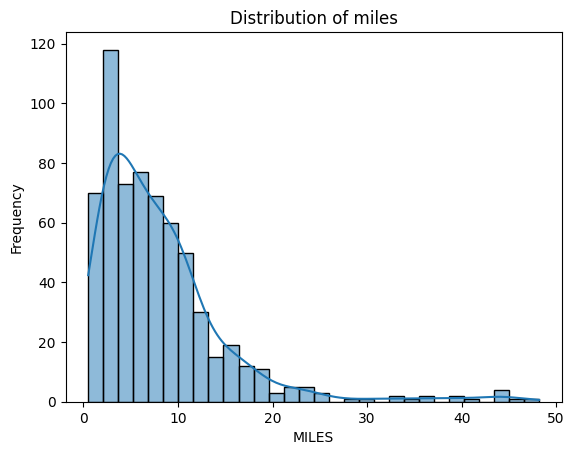

In [89]:
sns.histplot(df[df['MILES']<50]['MILES'], kde=True , bins= 30)
plt.title('Distribution of miles')
plt.xlabel('MILES')
plt.ylabel('Frequency')

From above graph we can conclude that most of the rides are within 10 to 20 miles ,therefore we should have to hire more drivers and made ad with these area

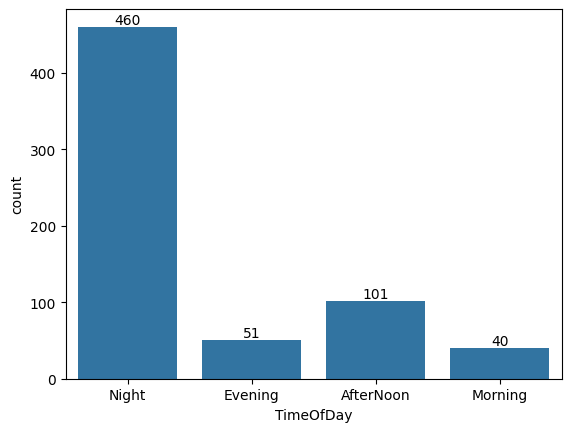

In [92]:
ax=sns.countplot(data=df, x='TimeOfDay')
for bars in ax.containers:
  ax.bar_label(bars)

from above graph we can say that more rides taken by customer is from 8 pm to 5 am means at Night

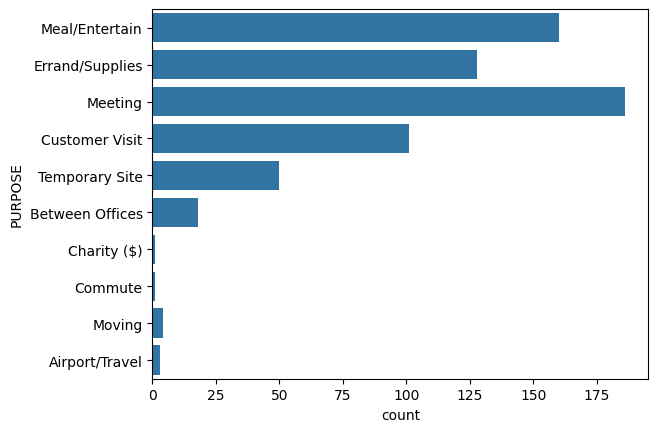

In [102]:
ax= sns.countplot(data=df, y='PURPOSE')


<Axes: xlabel='SPEED', ylabel='PURPOSE'>

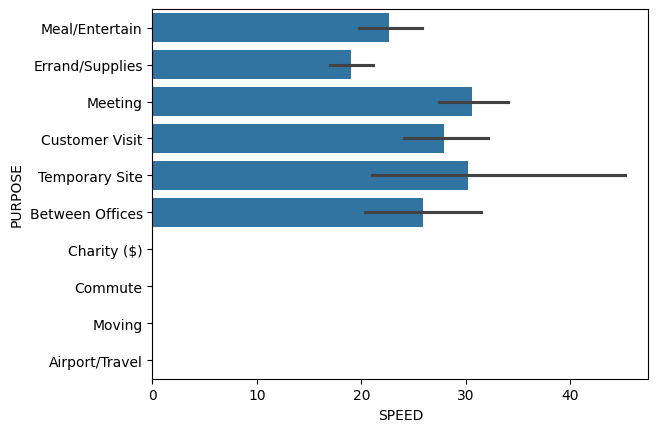

In [104]:
sns.barplot(data=df, y='PURPOSE', x='SPEED')

here, from above two graph as it showing that for meeting purpose rides are in more number similarly in 2nd bargraph it showing meeting purpose

<Axes: xlabel='MILES', ylabel='CATEGORY'>

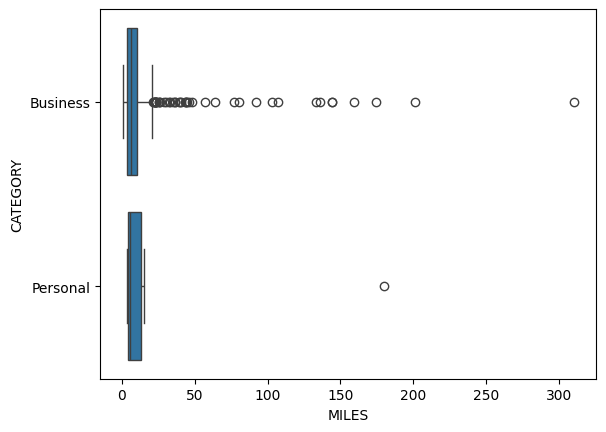

In [109]:
sns.boxplot(data=df,y='CATEGORY' , x='MILES')

from this above graph we can clearly say that in business category the rides are long as compare to personal and also shows density and outliers

<Axes: xlabel='Month', ylabel='Trip_Type'>

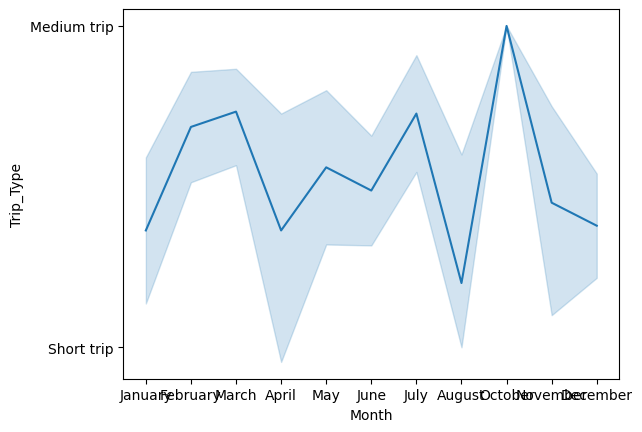

In [110]:
sns.lineplot(data=df, x='Month' , y='Trip_Type')


As we can observe from above graph in the month of november medium rides increase

<Axes: xlabel='MILES', ylabel='SPEED'>

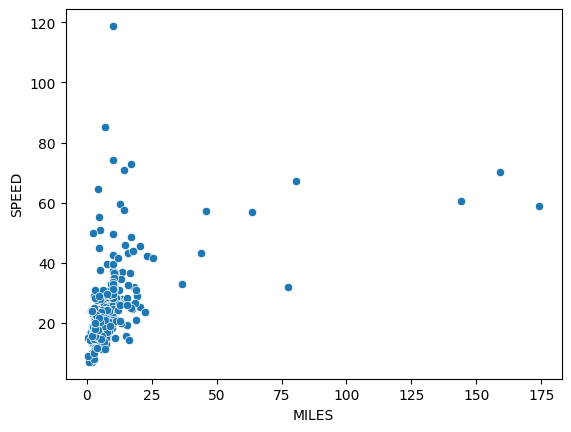

In [113]:
sns.scatterplot(data=df, x='MILES', y='SPEED')

AS THIS  graph showing that from 0 to 25 Miles the speed was mostly upto 40


([<matplotlib.patches.Wedge at 0x7ce4d536b110>,
 [Text(-1.0995403386698948, 0.03179691239245274, 'Business'),
  Text(1.099540333868682, -0.031797078418424454, 'Personal')],
 [Text(-0.5997492756381243, 0.01734377039588331, '99.08%'),
  Text(0.599749273019281, -0.017343860955504248, '0.92%')])

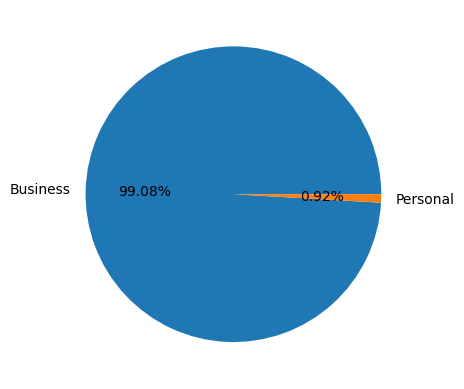

In [119]:
plt.pie(df['CATEGORY'].value_counts() ,  labels=df['CATEGORY'].unique() , autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x7ce4d5f68b90>,
 [Text(-0.16893629694728157, 1.0869501035345368, 'Medium trip'),
  Text(-0.08471949287704995, -1.096732696479254, 'Short trip'),
  Text(1.070710525358338, -0.25214870788261456, 'Long trip')],
 [Text(-0.09214707106215358, 0.5928818746552018, '54.91%'),
  Text(-0.046210632478390884, -0.5982178344432294, '37.73%'),
  Text(0.5840239229227298, -0.13753565884506247, '7.36%')])

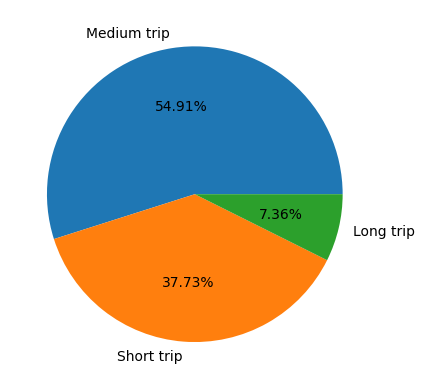

In [125]:
plt.pie(df['Trip_Type'].value_counts(), labels=df['Trip_Type'].unique(), autopct='%1.2f%%')

from above graph we can conclude that the medium rides are more in numbers which are from 5 to 20 miles ride